In [1]:
import pandas as pd
import json,csv,re,os,sys,glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [55]:
times=[]
content=[]
topics=[]

for f in glob.glob('../data/2014-06/Data*json')[0:50]:
    for line in open(f,'r').read().decode('utf-8').split('\n'):
        tweet=json.loads(line)
        
        try:
            times.append(tweet['interaction']['created_at'])
        except:
            times.append('NaN')
            
        try:
            content.append(tweet['interaction']['content'].encode('utf-8'))
        except:
            content.append('NaN')
            
        try:
            topics.append(tweet['interaction']['tag_tree']['topic'][0])
        except:
            topics.append('NaN')

In [5]:
outFile=csv.writer(open('times_file.csv','w'),delimiter='\t')
for a,b,c in zip(times,content,topics):
    outFile.writerow([a,b,c])

In [6]:
df=pd.read_csv('times_file.csv',parse_dates=True,header=False,index_col=0,delimiter='\t',names=['content','topics'])

In [91]:
series=pd.Series(data=topics,index=times)
#df=pd.DataFrame(data={'topic':topics},index=pd.to_datetime(times))

In [7]:
df.head()

,content,topics
2014-06-08 00:28:35,7 Reasons America Should Succeed On Climate Ch...,General
2014-06-08 02:03:23,9 Political #Cartoons That Put #ClimateChange ...,NaN
2014-06-08 00:11:24,RT @CFAware: There is a concern that people wi...,PoliticsBehaviour
2014-06-08 05:20:05,RT @washingtonpost: This map from 1893 explain...,General
2014-06-08 01:50:59,"RT @RealBobbyHooper: Who wants to drink, smoke...",Energy


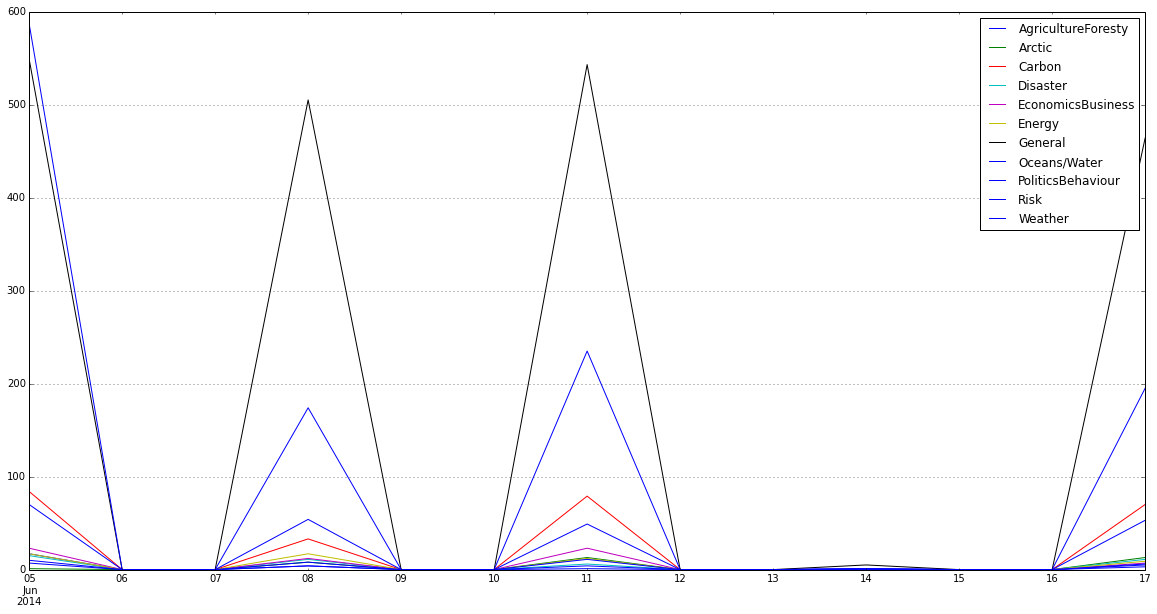

In [41]:
for a,b in df.groupby('topics'):
    b.resample('D',how='count')['content'].plot(label=a,legend=True,figsize=(20,10),logy=False)
#    print type(b)

In [13]:
b.resample('D',how='count')['content']
type(b.resample('D',how='count')['content'])

pandas.core.series.Series

In [17]:
b.resample('D',how='count')['content']+b.resample('D',how='count')['content']
#print '----------'
#b.resample('D',how='count')['content']

2014-06-05    14
2014-06-06     0
2014-06-07     0
2014-06-08    16
2014-06-09     0
2014-06-10     0
2014-06-11    22
2014-06-12     0
2014-06-13     0
2014-06-14     2
2014-06-15     0
2014-06-16     0
2014-06-17    12
Freq: D, Name: content, dtype: int64

In [39]:
bSeries=b.resample('D',how='count')['content']
#bSeries.combine(bSeries,func=lambda x,y:x+y,fill_value=0)
bSeries.add(bSeries)
#bSeries

2014-06-05    14
2014-06-06     0
2014-06-07     0
2014-06-08    16
2014-06-09     0
2014-06-10     0
2014-06-11    22
2014-06-12     0
2014-06-13     0
2014-06-14     2
2014-06-15     0
2014-06-16     0
2014-06-17    12
Freq: D, Name: content, dtype: int64

In [25]:
?bSeries.combine

In [44]:
a=df.groupby('topics')

In [53]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',800)

In [52]:
?pd.set_option

In [54]:
a.describe()

content
topics                                                                                                                                                                                  
AgricultureForesty count                                                                                                                                                              28
                   unique                                                                                                                                                             28
                   top                   RT @InWinC: great discount http://t.co/usxfoRIfMs #gifts #giveaway #sundayfunday #environment #eco #birthdays #CHRISTMAS http://t.co/CCHbowf6Zw
                   freq                                                                                                                                                                1
Arctic             count                                                                                                                                                              35
                   unique                                                                                                                                                             34
                   top            RT @NASA_EO: Ponds predict Arctic sea-ice melt http://t.co/P2iCJWo12w http://t.co/a5LicRSe9w Background: http://t.co/Xwn4ssRNaH http://t.co/4frU2DmpE6
                   freq                                                                                                                                                                2
Carbon             count                                                                                                                                                             266
                   unique                                                                                                                                                            232
                   top                        RT @richardbranson: How can we reduce carbon footprint? Renewable jet fuel commercialisation http://t.co/bU5BSvTjvv http://t.co/fAoWuVvzGU
                   freq                                                                                                                                                                8
Disaster           count                                                                                                                                                              43
                   unique                                                                                                                                                             42
                   top               RT @Omniclimate: Afghanistan-Flood Kills More Than 100 In Afghanistan #auspol #climateimpacts #climate #flood #Afghanistan - http://t.co/SneSJjaRxz
                   freq                                                                                                                                                                2
EconomicsBusiness  count                                                                                                                                                              65
                   unique                                                                                                                                                             58
                   top                                           RT @iMariaJohnsen: Avoid Glorifying Sycophant People in the Work Environment http://t.co/OoGg5GcDoK #HR #work #business
                   freq                                                                                                                                                                5
Energy             count                                                                                   

In [1]:
from IPython.core.display import HTML
styles = open("../css/custom.css", "r").read()
HTML(styles)